# 패키지 로딩

In [6]:
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 하이퍼 파라미터 설정

In [7]:
EPOCH = 100
BATCH = 32

# 데이터 로딩

In [9]:
housing = fetch_california_housing()
rawDB = pd.DataFrame(housing.data, columns=housing.feature_names)
print(rawDB.shape)
display(rawDB.head())

(20640, 8)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
x = rawDB.drop(['Latitude','Longitude'], axis = 1)
y = housing.target

# 학습/평가 데이터 분리

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=10)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, train_size=0.8, random_state=10)
print('학습 데이터 모양', x_train.shape, y_train.shape)
print('검증 데이터 모양', x_valid.shape, y_valid.shape)
print('평가 데이터 모양', x_test.shape, y_test.shape)

학습 데이터 모양 (13209, 6) (13209,)
검증 데이터 모양 (3303, 6) (3303,)
평가 데이터 모양 (4128, 6) (4128,)


# 데이터 스케일링

In [15]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

# 모델 생성 및 학습 

In [18]:
model = Sequential()
model.add(Dense(units=30, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=1, activation='linear'))
print(model.summary())

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 30)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │           3,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,411 (13.32 KB)

 Trainable params: 3,411 (13.32 KB)

 Non-trainable params: 0 (0.00 B)

None


In [19]:
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])
history = model.fit(x_train, y_train, epochs=EPOCH, batch_size=BATCH, validation_data=(x_valid, y_valid), verbose = 1)

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.1273 - mae: 0.7755 - val_loss: 1.0398 - val_mae: 0.5600
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 0.5814 - mae: 0.5546 - val_loss: 0.5275 - val_mae: 0.5220
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - loss: 0.5284 - mae: 0.5289 - val_loss: 0.4658 - val_mae: 0.5074
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - loss: 0.4714 - mae: 0.5014 - val_loss: 0.4657 - val_mae: 0.4974
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - loss: 0.4731 - mae: 0.5039 - val_loss: 0.4440 - val_mae: 0.4852
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 0.4513 - mae: 0.4895 - val_loss: 0.4433 - val_mae: 0.4830
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 0.4684 - mae: 0.4988 - val_loss: 0.4391 - val_mae: 0.4863
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - loss: 0.4419 - mae: 0.4869 - val_loss: 0.4371 - val_mae: 0.4820
Epoch 9/100
413/413 ━━━━━━━━━━━━━━

# 모델 평가

In [20]:
loss, mae = model.evaluate(x_test, y_test)
print(f'Test loss:{loss:.3f}')
print(f'Test MAE:{mae:.3f}')

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - loss: 0.3995 - mae: 0.4510
Test loss:0.410
Test MAE:0.452


In [22]:
from sklearn.metrics import r2_score

y_hat = model.predict(x_test)
print(f'R2 Score:{r2_score(y_test, y_hat):.3f}')

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
R2 Score:0.700


In [26]:
print(type(history))
# print(history)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
# print(train_loss[:10])

<class 'keras.src.callbacks.history.History'>
[0.8143373727798462, 0.6299998760223389, 0.5060989260673523, 0.4936102330684662, 0.4732559323310852, 0.46250420808792114, 0.4575524628162384, 0.4510935842990875, 0.4453427493572235, 0.44226589798927307]


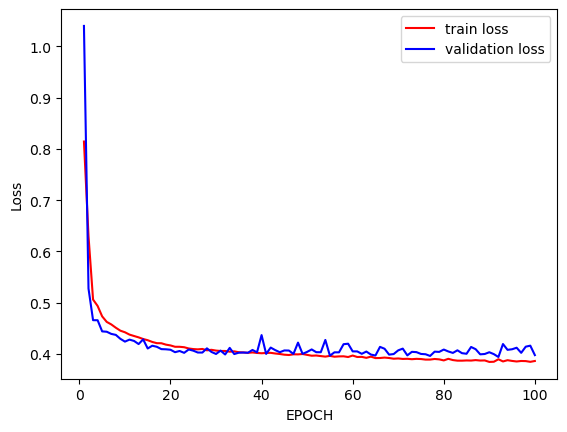

In [27]:
import matplotlib.pyplot as plt

plt.plot(range(1, EPOCH+1), train_loss, color='r', label='train loss')
plt.plot(range(1, EPOCH+1), val_loss, color='b', label='validation loss')
plt.xlabel('EPOCH')
plt.ylabel('Loss')
plt.legend()
plt.show()